In [1]:
!git clone https://github.com/mfzulfikarr/kumpulandataset

Cloning into 'kumpulandataset'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (59/59), 650.84 KiB | 2.41 MiB/s, done.


# Using Data from kaggle

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.7 MB/s eta 0:00:00


In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import seaborn as sns
import tensorflow as tf
import transformers

In [43]:
data = pd.read_csv('https://raw.githubusercontent.com/mfzulfikarr/kumpulandataset/main/Dataset_sentiment_analysis/Kaggle/Dataset%20Kaggle.csv')
# data = pd.read_excel('Dataset_kaggle_edt.xlsx')
# data = data.to_csv('Dataset_kaggle_edt.csv')
# data = pd.read_csv('Dataset_kaggle_edt.csv')
data.head()

,Sentiment,Text Tweet
0,cinta,Setiap kesempatan yg pernah hadir tuk dapat me...
1,cinta,kan kupeluk engkau erat2 hingga tak ada seoran...
2,cinta,Kenapa pasangan seringkali diibaratkan sebagai...
3,cinta,Ku rindu bisik mu di telingaku Seraya kau berk...
4,cinta,halohaa selamat siang Denise Udah pulang sekol...


In [44]:
temp = data.groupby('Sentiment').count()['Text Tweet'].reset_index().sort_values(by='Text Tweet', ascending=False)
temp.style.background_gradient(cmap='Blues')

,Sentiment,Text Tweet
1,marah,1101
3,senang,1017
2,sedih,997
4,takut,649
0,cinta,637


In [45]:
# data.drop(columns=['Id'], inplace=True)
# data.replace(to_replace='negative', value=0, inplace=True)
# data.replace(to_replace='positive', value=1, inplace=True)
# data.replace(to_replace='marah', value=0, inplace=True)
# data.replace(to_replace='cinta', value=1, inplace=True)
# data.replace(to_replace='sedih', value=2, inplace=True)
# data.replace(to_replace='senang', value=3, inplace=True)
# data.replace(to_replace='takut', value=4, inplace=True)

In [46]:
emosi = ['marah', 'cinta', 'sedih', 'senang', 'takut']
i = 0
for e in emosi:
  data.replace(to_replace=e, value=i, inplace=True)
  i+=1
  
data = data[['Text Tweet', 'Sentiment']]
data

,Text Tweet,Sentiment
0,Setiap kesempatan yg pernah hadir tuk dapat me...,1
1,kan kupeluk engkau erat2 hingga tak ada seoran...,1
2,Kenapa pasangan seringkali diibaratkan sebagai...,1
3,Ku rindu bisik mu di telingaku Seraya kau berk...,1
4,halohaa selamat siang Denise Udah pulang sekol...,1
...,...,...
4396,Eh barusan temen w satunya cerita katanya do'i...,4
4397,Patut x aq buka hati aq utk terima org lain? T...,4
4398,"Apa darenya? ""Kalo ada salah satu yang pergi, ...",4
4399,[USERNAME] Anti bank bank club. Gue jadi kepo ...,4


In [47]:
raw_data = data.copy()

**Text Preprocessing**

In [48]:
def text_preprocessing(text):
  text = text.lower() #lowercase
  text = re.sub(r'#.+','', text) #menghapus tag
  text = re.sub(r'https?://\S+','', text) #menghapus url
  text = re.sub(r'[-+]?[0-9]+','', text) #menghapus angka
  text = re.sub(r'[^\w\s]','', text) #menghapus tanda baca
  text = text.strip() #menghapus whitespace
  return text

In [49]:
data['Text Tweet'] = data['Text Tweet'].apply(text_preprocessing)
data.head()

,Text Tweet,Sentiment
0,setiap kesempatan yg pernah hadir tuk dapat me...,1
1,kan kupeluk engkau erat hingga tak ada seorang...,1
2,kenapa pasangan seringkali diibaratkan sebagai...,1
3,ku rindu bisik mu di telingaku seraya kau berk...,1
4,halohaa selamat siang denise udah pulang sekol...,1


**Pembagian Data training, Data testing, dan Data validation**

In [50]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.5, random_state=0)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=0)
df_train.shape, df_test.shape, df_val.shape

((2200, 2), (1101, 2), (1100, 2))

**Ekstraksi Fitur dengan IndoBERT**

In [51]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

In [52]:
print('kalimat: ', raw_data['Text Tweet'][1])
print('Bert tokenizer: ', bert_tokenizer.tokenize(data['Text Tweet'][1]))

kalimat:  kan kupeluk engkau erat2 hingga tak ada seorang pun yang bisa merebut mu dari pelukan ku senang anniversary syg #6nov #31months
Bert tokenizer:  ['kan', 'kup', '##eluk', 'engkau', 'erat', 'hingga', 'tak', 'ada', 'seorang', 'pun', 'yang', 'bisa', 'merebut', 'mu', 'dari', 'pelukan', 'ku', 'senang', 'ann', '##ivers', '##ary', 'sy', '##g']


Add_special_tokens = Menambahkan token [CLS] diawal dan [SEP] diakhir kalimat<br>
Padding = menambahkan padding ke max length menggunakan token [PAD] jika kalimat kurang dari max_length<br>
truncation = truncate jika kalimat lebih dari max_length

In [53]:
bert_input = bert_tokenizer.encode_plus(
    data['Text Tweet'][1],
    add_special_tokens = True,
    padding = 'max_length',
    truncation = 'longest_first',
    max_length = 50,
    return_attention_mask = True,
    return_token_type_ids = True
)
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [54]:
# token_lens = []
# for txt in data['Text Tweet']:
#   tokens = bert_tokenizer.encode(txt)
#   token_lens.append(len(tokens))
# sns.histplot(token_lens, kde = True, stat='density', linewidth = 0)
# plt.xlim([0, 100]);
# plt.xlabel('Token count');

In [55]:
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens = True,
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = 42,
      return_attention_mask = True,
      return_token_type_ids = True
  )

In [56]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [57]:
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  
  for sentence, label in data.to_numpy():
    bert_input = convert_example_to_feature(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [58]:
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

**Menggunakan model pre-trained IndoBERT**

In [59]:
from transformers import TFBertForSequenceClassification
bert_model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p2',
                                                             num_labels = 5,
                                                             hidden_dropout_prob = 0.5,
                                                             attention_probs_dropout_prob = 0.5)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Model compile**

In [60]:
bert_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00002),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
)

**Menggunakan Early Stopping untuk mencegah overfitting**

In [61]:
callback_ES = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    min_delta=0.05,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [62]:
bert_history = bert_model.fit(train_encoded, epochs = 15,
                              batch_size = 32,
                              validation_data = val_encoded,
                              callbacks = [callback_ES])

Epoch 1/15
69/69 [==============================] - 44s 395ms/step - loss: 1.5067 - accuracy: 0.3164 - val_loss: 1.2192 - val_accuracy: 0.5382
Epoch 2/15
69/69 [==============================] - 24s 350ms/step - loss: 1.2118 - accuracy: 0.5095 - val_loss: 0.9938 - val_accuracy: 0.5818
Epoch 3/15
69/69 [==============================] - 24s 353ms/step - loss: 1.0207 - accuracy: 0.6027 - val_loss: 0.9469 - val_accuracy: 0.6218
Epoch 4/15
69/69 [==============================] - 24s 347ms/step - loss: 0.8896 - accuracy: 0.6682 - val_loss: 0.9029 - val_accuracy: 0.6591
Epoch 5/15
69/69 [==============================] - 24s 348ms/step - loss: 0.8018 - accuracy: 0.7059 - val_loss: 0.8779 - val_accuracy: 0.6836
Epoch 6/15
69/69 [==============================] - 24s 350ms/step - loss: 0.7129 - accuracy: 0.7473 - val_loss: 0.8824 - val_accuracy: 0.6773
Epoch 7/15
69/69 [==============================] - 24s 353ms/step - loss: 0.6814 - accuracy: 0.7645 - val_loss: 1.0017 - val_accuracy: 0.6700

In [63]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

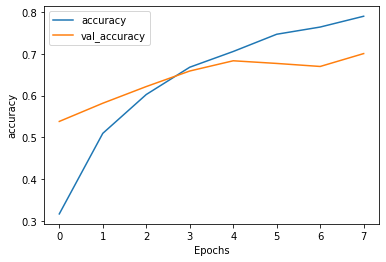

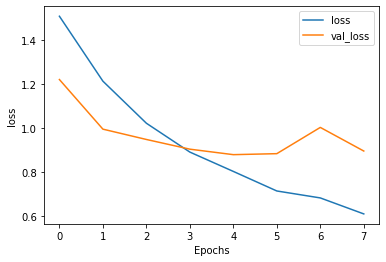

In [64]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [65]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(3):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i],
                                                            bert_history.history['loss'][i],
                                                            bert_history.history['val_accuracy'][i],
                                                            bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.316364 	   1.506731 	   0.538182 	   1.219162
       2   0.509545 	   1.211792 	   0.581818 	   0.993803
       3   0.602727 	   1.020678 	   0.621818 	   0.946935


In [66]:
bert_model.save_weights('bert-model.h5')

In [67]:
score = bert_model.evaluate(test_encoded)
print("Test Accuracy: ", score[1])

35/35 [==============================] - 4s 101ms/step - loss: 1.0011 - accuracy: 0.6821
Test Accuracy:  0.682107150554657


In [68]:
score

[1.0011351108551025, 0.682107150554657]

In [69]:
predicted_raw = bert_model.predict(test_encoded)

35/35 [==============================] - 6s 99ms/step


In [70]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['Sentiment'])

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.6821071752951862

In [72]:
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix

array([[186,  10,  51,  28,  36],
       [  0, 154,   6,  14,   2],
       [ 14,  32, 126,  37,  32],
       [  8,  26,  16, 174,   8],
       [  9,   2,  14,   5, 111]])

Hasil akurasi dengan model pre-trained indoBERT

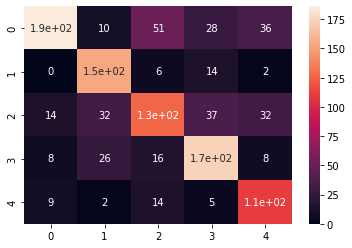

In [73]:
sns.heatmap(cf_matrix, annot=True)

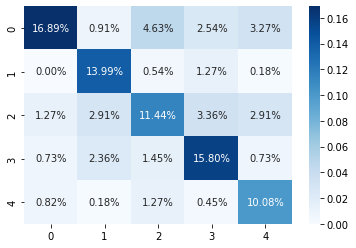

In [74]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [75]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.70       311
           1       0.69      0.88      0.77       176
           2       0.59      0.52      0.56       241
           3       0.67      0.75      0.71       232
           4       0.59      0.79      0.67       141

    accuracy                           0.68      1101
   macro avg       0.68      0.71      0.68      1101
weighted avg       0.70      0.68      0.68      1101



In [76]:
bert_load_model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p2', num_labels = 5)
bert_load_model.load_weights('bert-model.h5')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Test Prediksi dengan Input**

In [81]:
# input_text = 'filmkartini menginspirasi untuk berjuang menjunjung nilai kebenaran bukan dominasi penguasa dan kekakuan budaya'
input_text = 'Kerjaku dadi terhambat tenan, padahal wes tresno ro ihehon terosss lho.'

input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation = True,
                                             padding = 'max_length',
                                             return_tensors = 'tf')

In [82]:
bert_predict = bert_load_model(input_text_tokenized)
bert_output = tf.nn.softmax(bert_predict[0], axis = -1)

In [83]:
sentiment_labels = ['Marah', 'Cinta', 'Sedih', 'Senang', 'Takut']
label = tf.argmax(bert_output, axis = 1)
label = label.numpy()

In [84]:
print(input_text, ':', sentiment_labels[label[0]])

Kerjaku dadi terhambat tenan, padahal wes tresno ro ihehon terosss lho. : Marah
